High Density Regions can be used to find cross sections across a multi-dimensional space that have the highest concentrations of data points. It can also be used to compute the average value of an aggregate statistic with respect to a target variable.

In [2]:
import kernelml
import numpy as np
import pandas as pd


import re
df = pd.read_csv('data/Pokemon.csv').fillna('')
types = np.concatenate([df['Type 1'].unique(),df['Type 2'].unique()])
df['Type']=df[['Type 1','Type 2']].apply(lambda x: str(x[0])+str(x[1]),axis=1)
df.drop(['Type 1','Type 2'],axis=1,inplace=True)
df['Mega'] = df.Name.apply(lambda x: len(re.findall('Mega',x))>0).astype(np.int)
df['Grass'] = df.Type.apply(lambda x: len(re.findall('Grass',x))>0).astype(np.int)

features = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

y = df[features].fillna(0).values.astype(np.float)



model = kernelml.region_estimator.DensityFactorization(number_of_clusters=24)

#agg_func: 'mean', 'variance', 'max', 'false-positive-cost', 'false-negative-cost', 'count'
model.optimize(X=y,y=y, bins_per_dimension=61, number_of_random_simulations=100, 
               number_of_realizations=20, smoothing_parameter=3.0,
                 agg_func='count')



realization 0 loss 171.67239049641907 time 5.472027063369751
realization 1 loss 117.43002982611999 time 6.277666807174683
realization 2 loss 92.35021381878278 time 5.8795037269592285
realization 3 loss 76.59121116759859 time 5.367983818054199
realization 4 loss 61.99880645116056 time 5.866480827331543
realization 5 loss 56.762592883400956 time 5.715057849884033
realization 6 loss 50.170532421877475 time 5.103376150131226
realization 7 loss 43.64642377914929 time 4.970755100250244
realization 8 loss 39.584083327950104 time 4.894855976104736
realization 9 loss 38.29873105854703 time 5.663649082183838
realization 10 loss 35.225843273854196 time 5.215898752212524
realization 11 loss 32.18447617183364 time 5.4110331535339355
realization 12 loss 31.486764143508502 time 5.687544822692871
realization 13 loss 31.198150260475675 time 4.787401914596558
realization 14 loss 30.11122132139958 time 5.090587139129639
realization 15 loss 27.2643191498029 time 4.858840703964233
realization 16 loss 25.68

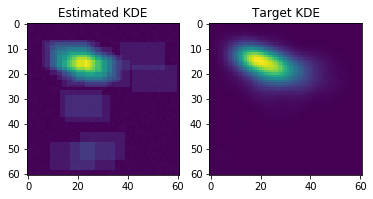

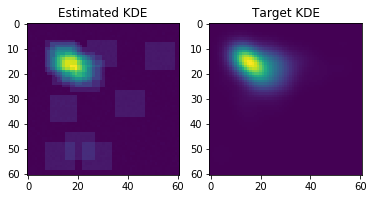

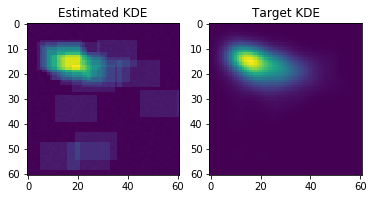

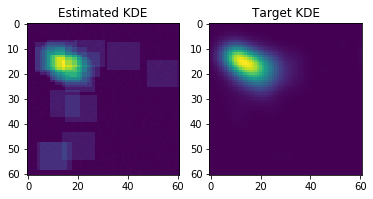

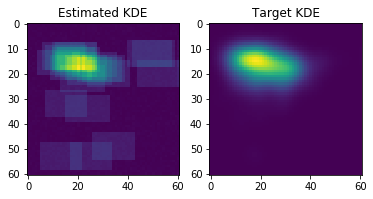

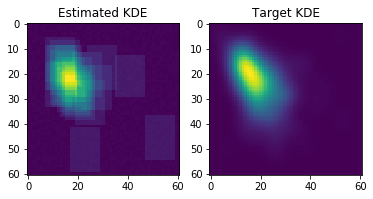

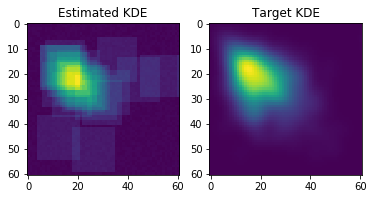

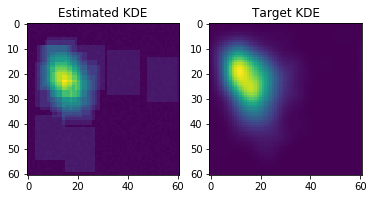

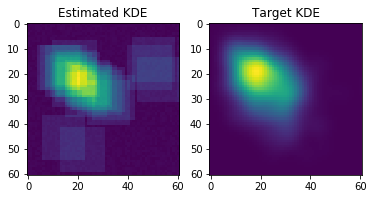

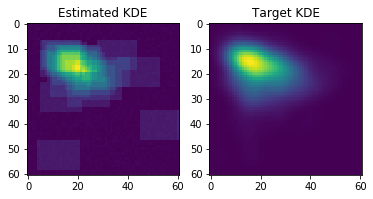

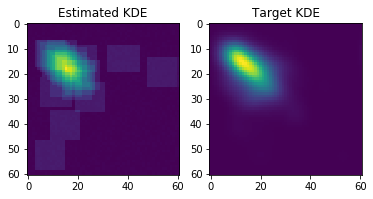

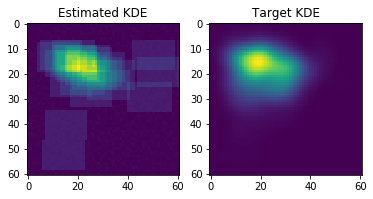

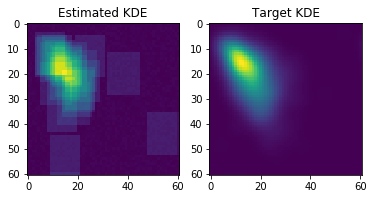

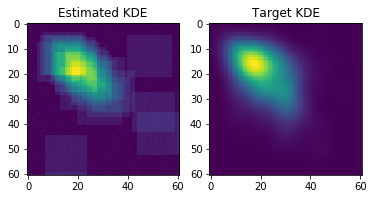

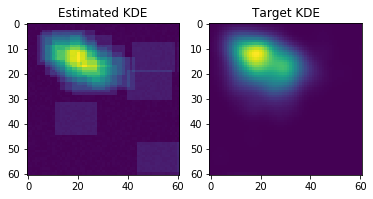

In [4]:
#inspect distributions
import matplotlib.pyplot as plt
count=0
for i,j in model.dim_combos:
    
    plt.subplot(1,2,1)
    plt.imshow(model.kde_estimate[count])
    plt.title('Estimated KDE')

#     plt.show()
    plt.subplot(1,2,2)
    plt.imshow(model.kde_target[count])
    plt.title('Target KDE')
    plt.show()
    count+=1

In [5]:
#choose pad value and prune clusters with fewer data points than the limit
pad=1.25
model.prune_clusters(y,pad=pad,limit=20)

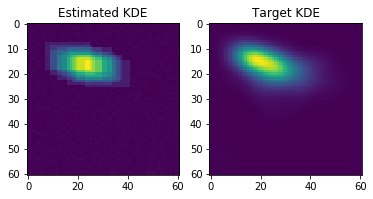

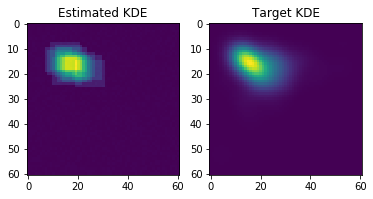

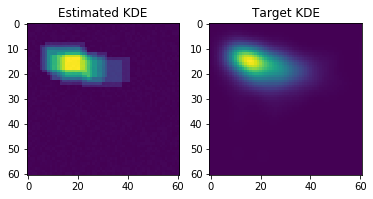

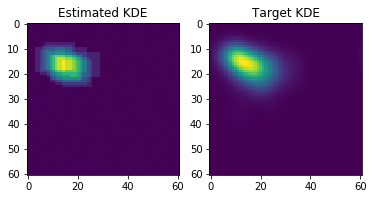

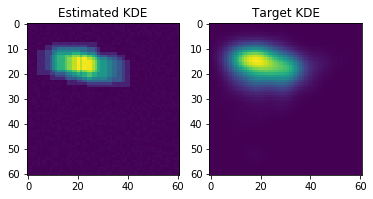

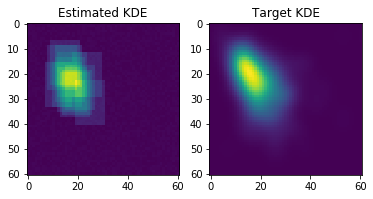

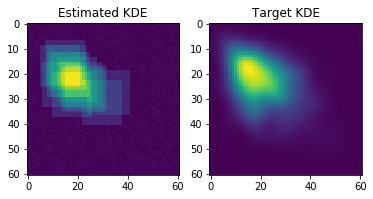

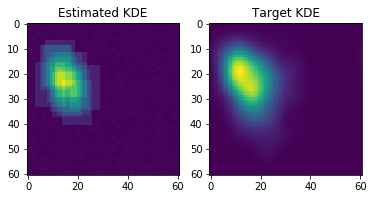

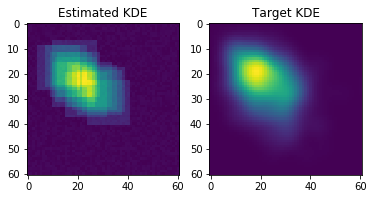

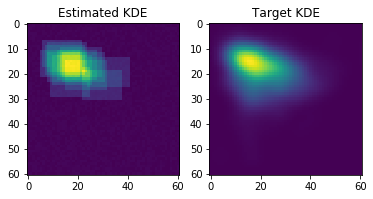

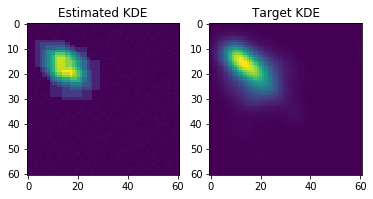

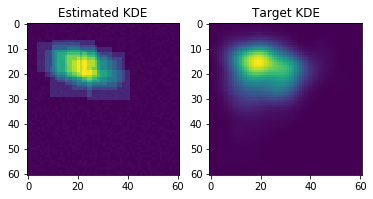

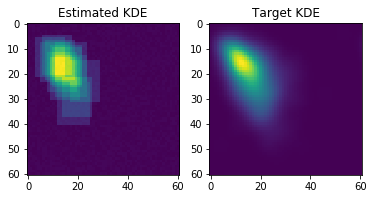

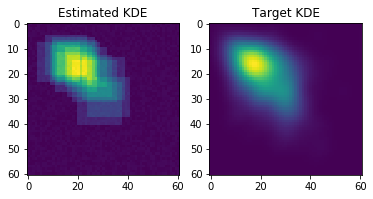

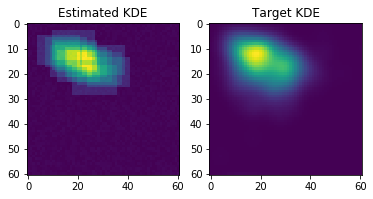

In [6]:
#inspect distributions
import matplotlib.pyplot as plt
count=0
for i,j in model.dim_combos:
    
    plt.subplot(1,2,1)
    plt.imshow(model.kde_estimate[count])
    plt.title('Estimated KDE')

#     plt.show()
    plt.subplot(1,2,2)
    plt.imshow(model.kde_target[count])
    plt.title('Target KDE')
    plt.show()
    count+=1

In [7]:
#get assignments
model.get_assignments(y,pad=pad)

array([[ True,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
pad=3.0
assignments = model.get_assignments(y,pad=pad)
#compute distances: 'chebyshev','euclidian','mae'
distances = model.get_distances(y,pad=pad,distance='chebyshev')

In [9]:
#number of assignements per cluster
np.sum(assignments,axis=0)

array([685, 767, 747, 693, 729, 753, 782, 734, 773, 732, 747, 670, 662])

In [10]:
#how many data points are in all clusters
np.sum(np.sum(assignments,axis=1)==model.num_clusters)

624

In [11]:
#how many data points not in clusters
np.sum(np.sum(assignments,axis=1)==0)

16

In [12]:
model.optimize(X=y,y=y, bins_per_dimension=61, number_of_random_simulations=100, 
               number_of_realizations=10, smoothing_parameter=3.0,
                 agg_func='count')

realization 0 loss 33.889614347622086 time 3.1260900497436523
realization 1 loss 27.66176003242709 time 3.3248989582061768
realization 2 loss 25.166841465951528 time 3.509298086166382
realization 3 loss 23.996198385498754 time 3.4114990234375
realization 4 loss 22.866735249152185 time 3.2275590896606445
realization 5 loss 21.213612989278598 time 3.5212459564208984
realization 6 loss 20.517150911060458 time 3.271965742111206
realization 7 loss 20.37563203548982 time 3.4384748935699463
realization 8 loss 19.44434052367471 time 3.2692930698394775
realization 9 loss 19.24595348524035 time 4.044164180755615


In [19]:
#cluster centroids and deviations
centroids = model.centroids_
deviations = model.deviations_

In [21]:
#outliers
pad=3.
assignments = model.get_assignments(y,pad=pad)

df[np.sum(assignments,axis=1)<1]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
121,113,Chansey,450,250,5,5,35,105,50,1,False,Normal,0,0
164,150,MewtwoMega Mewtwo Y,780,106,150,70,194,120,140,1,True,Psychic,1,0
217,202,Wobbuffet,405,190,33,58,33,58,33,2,False,Psychic,0,0
223,208,Steelix,510,75,85,200,55,65,30,2,False,SteelGround,0,0
224,208,SteelixMega Steelix,610,75,125,230,55,95,30,2,False,SteelGround,1,0
230,213,Shuckle,505,20,10,230,10,230,5,2,False,BugRock,0,0
261,242,Blissey,540,255,10,10,75,135,55,2,False,Normal,0,0
333,306,AggronMega Aggron,630,70,140,230,60,80,50,3,False,Steel,1,0
414,377,Regirock,580,80,100,200,50,100,50,3,True,Rock,0,0


In [57]:
pad=1.
model.prune_clusters(y,pad=pad,limit=20)
assignments = model.get_assignments(y,pad=pad)



lower = np.percentile(df[features].values,5,axis=0)
upper = np.percentile(df[features].values,95,axis=0)

mean_values = []
for k in range(model.num_clusters):
    view = df[assignments[:,k]==1][features].clip(lower,upper,axis=1)
    mean_values.append(view.mean().values.reshape(-1,1))
mean_values=np.hstack(mean_values).T
# mean_values=(mean_values-lower)/(upper-lower)
np.round(mean_values,2),features

(array([[59.44, 65.77, 62.37, 55.15, 63.07, 56.24],
        [77.94, 86.77, 82.12, 79.14, 80.87, 87.35],
        [55.53, 60.32, 51.83, 50.84, 50.44, 47.81],
        [54.67, 50.  , 50.8 , 60.67, 71.41, 55.46],
        [54.74, 64.56, 72.18, 54.19, 59.53, 48.68],
        [75.1 , 88.49, 71.74, 90.89, 74.52, 84.99],
        [78.1 , 65.02, 62.47, 61.41, 62.9 , 45.59],
        [52.  , 62.73, 50.65, 48.31, 48.05, 55.24]]),
 array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
       dtype='<U7'))

In [53]:
mean_values = mean_values/np.sum(mean_values,axis=0)
mean_values = mean_values/np.sum(mean_values,axis=1).reshape(-1,1)

In [54]:
np.round(mean_values,2)

array([[0.16, 0.17, 0.17, 0.15, 0.17, 0.16],
       [0.16, 0.16, 0.17, 0.16, 0.16, 0.19],
       [0.18, 0.18, 0.17, 0.16, 0.16, 0.16],
       [0.16, 0.14, 0.15, 0.18, 0.21, 0.17],
       [0.16, 0.17, 0.21, 0.16, 0.17, 0.15],
       [0.15, 0.17, 0.15, 0.19, 0.15, 0.18],
       [0.21, 0.16, 0.17, 0.17, 0.17, 0.13],
       [0.16, 0.19, 0.16, 0.15, 0.15, 0.18]])

In [35]:
import seaborn as sns

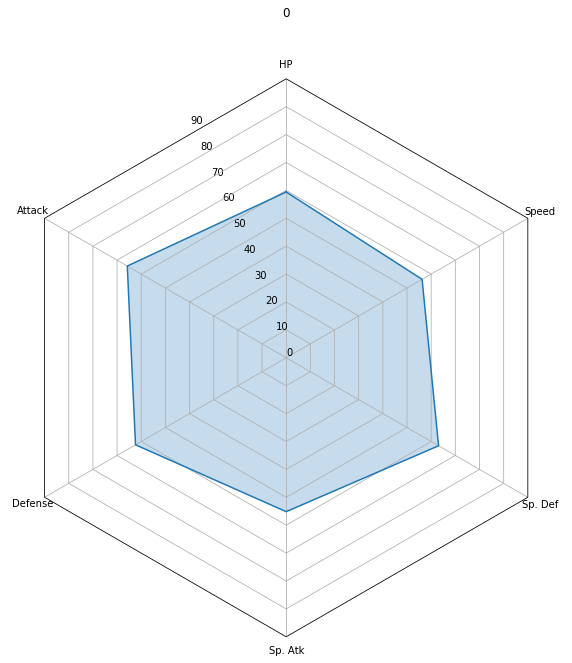

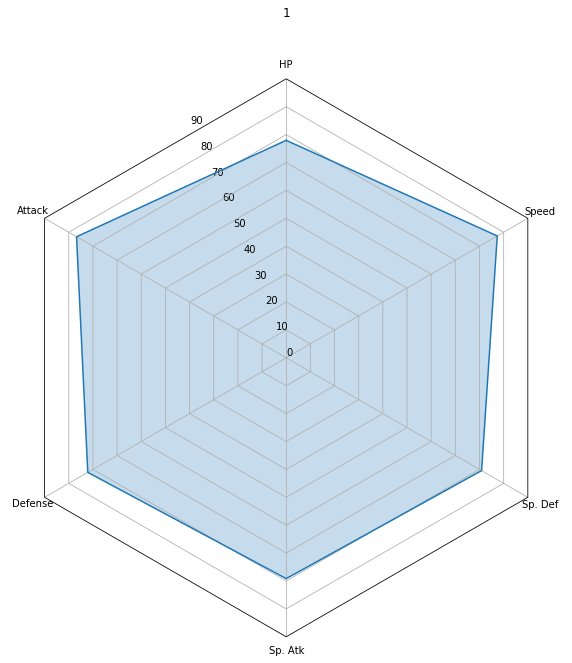

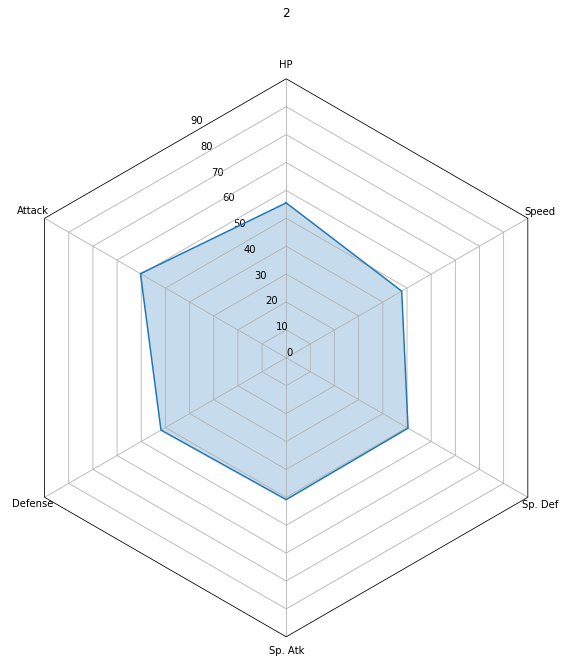

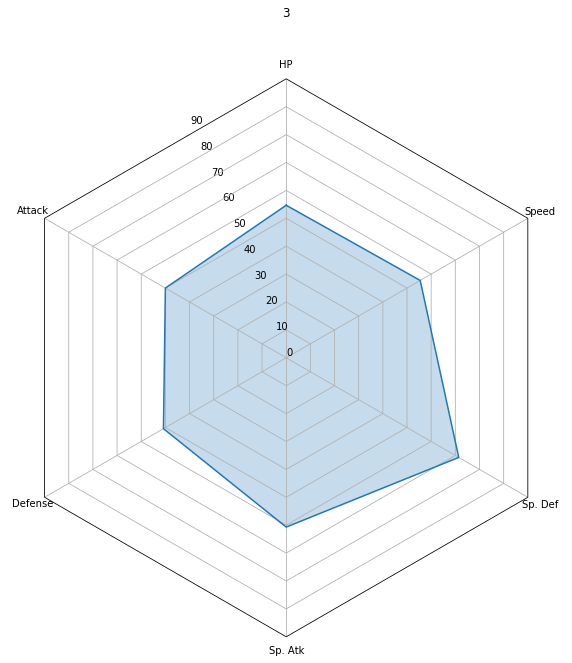

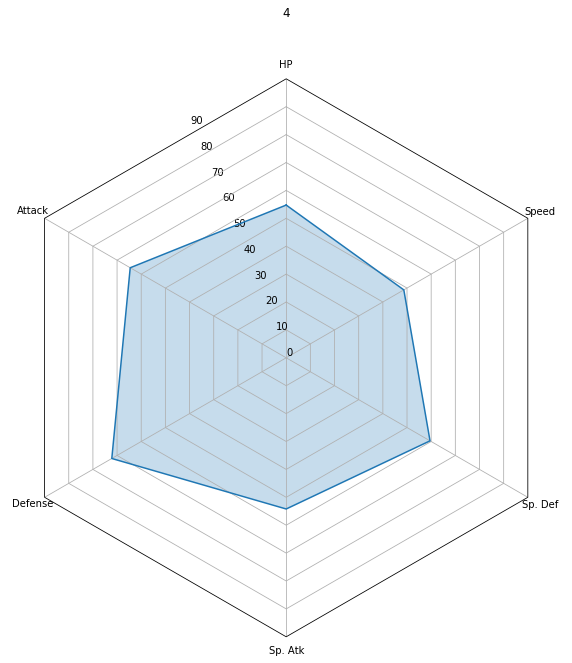

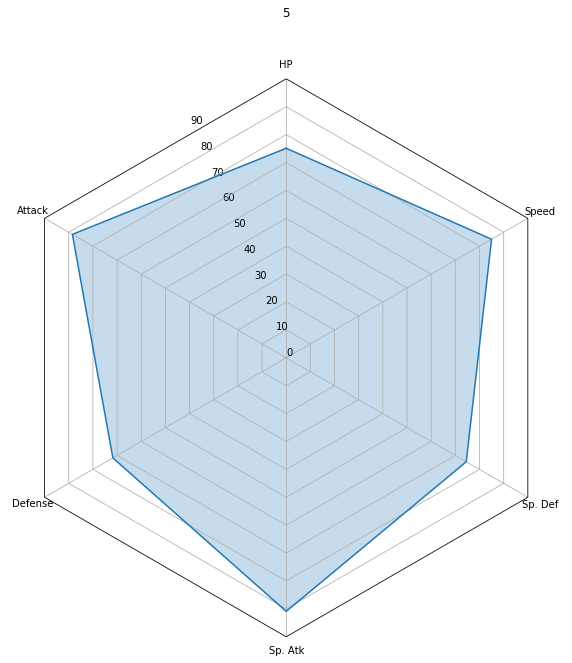

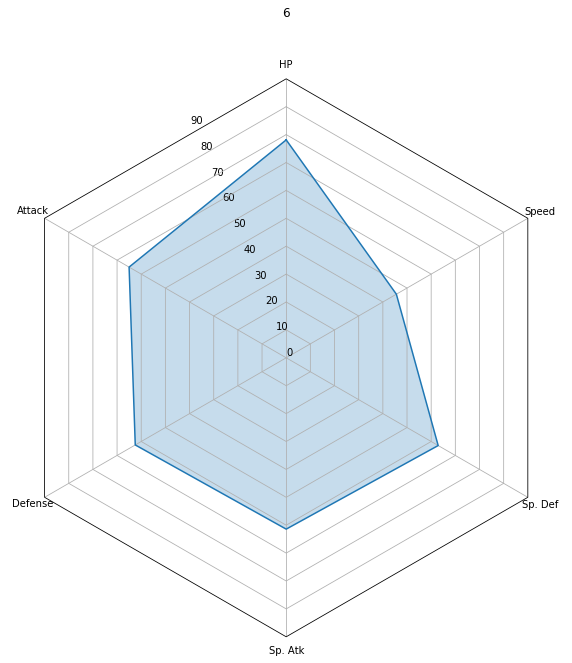

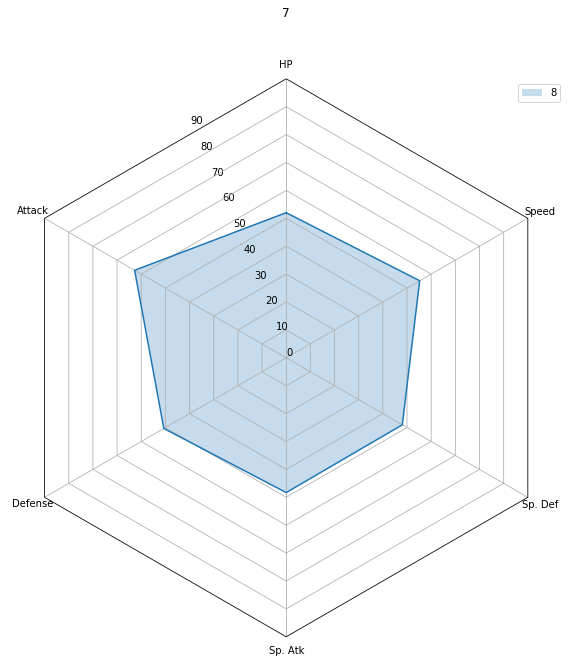

In [67]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta



N = mean_values.shape[0]
theta = radar_factory(N, frame='polygon')

spoke_labels = view[features].columns

tmp = mean_values

N = len(features)
theta = radar_factory(N, frame='polygon')

for d in range(tmp.shape[0]):
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids(np.linspace(0,90,10))

    title = str(d)

    ax.set_title(title,  position=(0.5, 1.1), ha='center')
    line = ax.plot(theta, tmp[d])
    ax.set_rlim(0,100)
    ax.fill(theta, tmp[d],  alpha=0.25,label=d+1)
    ax.set_varlabels(spoke_labels)

plt.legend()
plt.show()

In [75]:
df[assignments[:,5]==1].head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,GrassPoison,0,1
2,3,Venusaur,525,80,82,83,100,100,80,1,False,GrassPoison,0,1
5,5,Charmeleon,405,58,64,58,80,65,80,1,False,Fire,0,0
6,6,Charizard,534,78,84,78,109,85,100,1,False,FireFlying,0,0
10,8,Wartortle,405,59,63,80,65,80,58,1,False,Water,0,0


In [76]:
df[assignments[:,1]==1].head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
2,3,Venusaur,525,80,82,83,100,100,80,1,False,GrassPoison,0,1
11,9,Blastoise,530,79,83,100,85,105,78,1,False,Water,0,0
22,18,Pidgeot,479,83,80,75,70,70,101,1,False,NormalFlying,0,0
27,22,Fearow,442,65,90,65,61,61,100,1,False,NormalFlying,0,0
29,24,Arbok,438,60,85,69,65,79,80,1,False,Poison,0,0
